# ROC and ROC AUC Curve
IN logistic regression, threshold = 0.5(by default and u can change), ie.

        prediction > 0.5 ==> 1
        prediction <0.5 ==> 0

so we will see with ROC and AUC Curve what should be the threshold


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [54]:
#train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)


In [55]:
#create dummy model with default 0 as output
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [56]:
#create logisitci model
model = LogisticRegression()
model.fit (X_train, y_train)

LogisticRegression()

In [57]:
#prediction based on probability 
model_prob = model.predict_proba(X_test)
model_prob

array([[4.02958497e-03, 9.95970415e-01],
       [2.00643855e-03, 9.97993561e-01],
       [9.94696564e-01, 5.30343592e-03],
       [8.47909962e-01, 1.52090038e-01],
       [1.66614096e-03, 9.98333859e-01],
       [4.99240075e-01, 5.00759925e-01],
       [9.80208762e-01, 1.97912375e-02],
       [9.76507391e-01, 2.34926092e-02],
       [1.79866697e-02, 9.82013330e-01],
       [2.93132539e-01, 7.06867461e-01],
       [9.95836132e-01, 4.16386810e-03],
       [2.53456369e-01, 7.46543631e-01],
       [9.92314475e-01, 7.68552501e-03],
       [3.80237693e-02, 9.61976231e-01],
       [6.47256719e-02, 9.35274328e-01],
       [1.91873737e-01, 8.08126263e-01],
       [8.55142720e-01, 1.44857280e-01],
       [4.34150814e-02, 9.56584919e-01],
       [8.43060465e-01, 1.56939535e-01],
       [5.51009943e-02, 9.44899006e-01],
       [1.32996996e-01, 8.67003004e-01],
       [5.89343759e-01, 4.10656241e-01],
       [9.79492824e-01, 2.05071761e-02],
       [3.32717535e-01, 6.67282465e-01],
       [9.957351

In [58]:
#lets focus on one outcome - positive
model_prob = model_prob[:,1]
model_prob

array([9.95970415e-01, 9.97993561e-01, 5.30343592e-03, 1.52090038e-01,
       9.98333859e-01, 5.00759925e-01, 1.97912375e-02, 2.34926092e-02,
       9.82013330e-01, 7.06867461e-01, 4.16386810e-03, 7.46543631e-01,
       7.68552501e-03, 9.61976231e-01, 9.35274328e-01, 8.08126263e-01,
       1.44857280e-01, 9.56584919e-01, 1.56939535e-01, 9.44899006e-01,
       8.67003004e-01, 4.10656241e-01, 2.05071761e-02, 6.67282465e-01,
       4.26486101e-03, 9.56703979e-01, 6.93252059e-01, 9.94415039e-01,
       2.49140883e-02, 5.50434536e-01, 7.92009405e-01, 8.15198495e-01,
       8.19431826e-02, 8.23392187e-01, 1.53645300e-02, 7.98553843e-02,
       9.87574285e-01, 9.36956096e-01, 9.86341311e-01, 3.19853819e-01,
       9.84540971e-03, 3.82789214e-02, 9.85781033e-02, 9.83797199e-01,
       6.54170093e-03, 5.29760509e-01, 5.01978301e-01, 9.97757286e-01,
       8.40477518e-03, 1.42286510e-01, 2.22296854e-02, 6.48010060e-01,
       9.79148814e-01, 2.32774361e-01, 5.09438851e-02, 9.03886089e-01,
      

In [59]:
#calcuate roc auc score
dummy_model_roc_auc = roc_auc_score(y_test, dummy_model_prob)
model_roc_auc = roc_auc_score(y_test, model_prob)
print('Dummy Model: ROC AUC= %.3f' % (dummy_model_roc_auc))
print('Logistic Model: ROC AUC= %.3f' % (model_roc_auc))

Dummy Model: ROC AUC= 0.500
Logistic Model: ROC AUC= 0.903


ROC AUC give False positive rate(FPR) and true positive rate(TPR)

SO ROC Cuve is TPR - y-axis and FPR in x-axis

In [60]:
dummy_FPR, dummy_TPR,_ = roc_curve(y_test,dummy_model_prob)
model_FPR, model_TPR,thresholds = roc_curve(y_test,model_prob)


In [61]:
model_FPR, model_TPR

(array([0.        , 0.        , 0.        , 0.00416667, 0.00416667,
        0.00833333, 0.00833333, 0.0125    , 0.0125    , 0.01666667,
        0.01666667, 0.025     , 0.025     , 0.02916667, 0.02916667,
        0.0375    , 0.0375    , 0.04583333, 0.04583333, 0.05416667,
        0.05416667, 0.05833333, 0.05833333, 0.0625    , 0.0625    ,
        0.06666667, 0.06666667, 0.075     , 0.075     , 0.07916667,
        0.07916667, 0.08333333, 0.08333333, 0.0875    , 0.0875    ,
        0.09166667, 0.09166667, 0.09583333, 0.09583333, 0.10833333,
        0.10833333, 0.1125    , 0.1125    , 0.125     , 0.125     ,
        0.12916667, 0.12916667, 0.13333333, 0.13333333, 0.1375    ,
        0.1375    , 0.14166667, 0.14166667, 0.14583333, 0.14583333,
        0.15      , 0.15      , 0.15416667, 0.15416667, 0.15833333,
        0.15833333, 0.16666667, 0.16666667, 0.175     , 0.175     ,
        0.17916667, 0.17916667, 0.18333333, 0.18333333, 0.20416667,
        0.20416667, 0.20833333, 0.20833333, 0.21

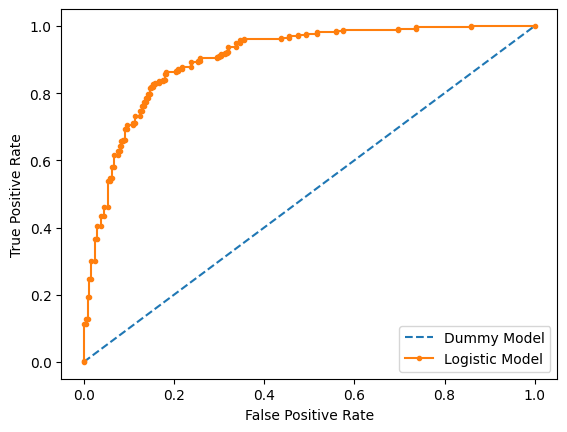

In [62]:
#plot roc curve
plt.plot(dummy_FPR, dummy_TPR, linestyle='--', label='Dummy Model')
plt.plot(model_FPR, model_TPR, marker='.', label='Logistic Model')
#labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



The ROC curve indicates that the Logistic Regression model is performing well. Further analysis, such as calculating the AUC and determining the optimal threshold, can provide more quantitative insights into the model's performance.

In [63]:
thresholds

array([           inf, 9.99810503e-01, 9.92402315e-01, 9.91677205e-01,
       9.90153247e-01, 9.89863193e-01, 9.79291291e-01, 9.79148814e-01,
       9.61967273e-01, 9.61700441e-01, 9.47468411e-01, 9.46112317e-01,
       9.24795167e-01, 9.23990129e-01, 9.03886089e-01, 8.96663710e-01,
       8.88199602e-01, 8.86984135e-01, 8.78000366e-01, 8.76716283e-01,
       8.28582740e-01, 8.27996082e-01, 8.23392187e-01, 8.22516292e-01,
       8.08227820e-01, 8.08126263e-01, 7.79262340e-01, 7.63165960e-01,
       7.61675237e-01, 7.58394024e-01, 7.49884660e-01, 7.46543631e-01,
       7.32863835e-01, 7.31006711e-01, 7.23590231e-01, 7.15878985e-01,
       6.93252059e-01, 6.92795480e-01, 6.92343752e-01, 6.83288808e-01,
       6.80122706e-01, 6.80054131e-01, 6.70109136e-01, 6.56534375e-01,
       6.47860767e-01, 6.46588774e-01, 6.35760391e-01, 6.35525482e-01,
       6.18775978e-01, 6.14872742e-01, 6.12482208e-01, 6.03364265e-01,
       5.92435470e-01, 5.90820185e-01, 5.73592143e-01, 5.70975637e-01,
      

now based on threshold values, we'll compute TPR and FPR and keep on plotting on all the points and whereever there is hight TPR and less FPR then that point will be captured and that will become the *threshold*

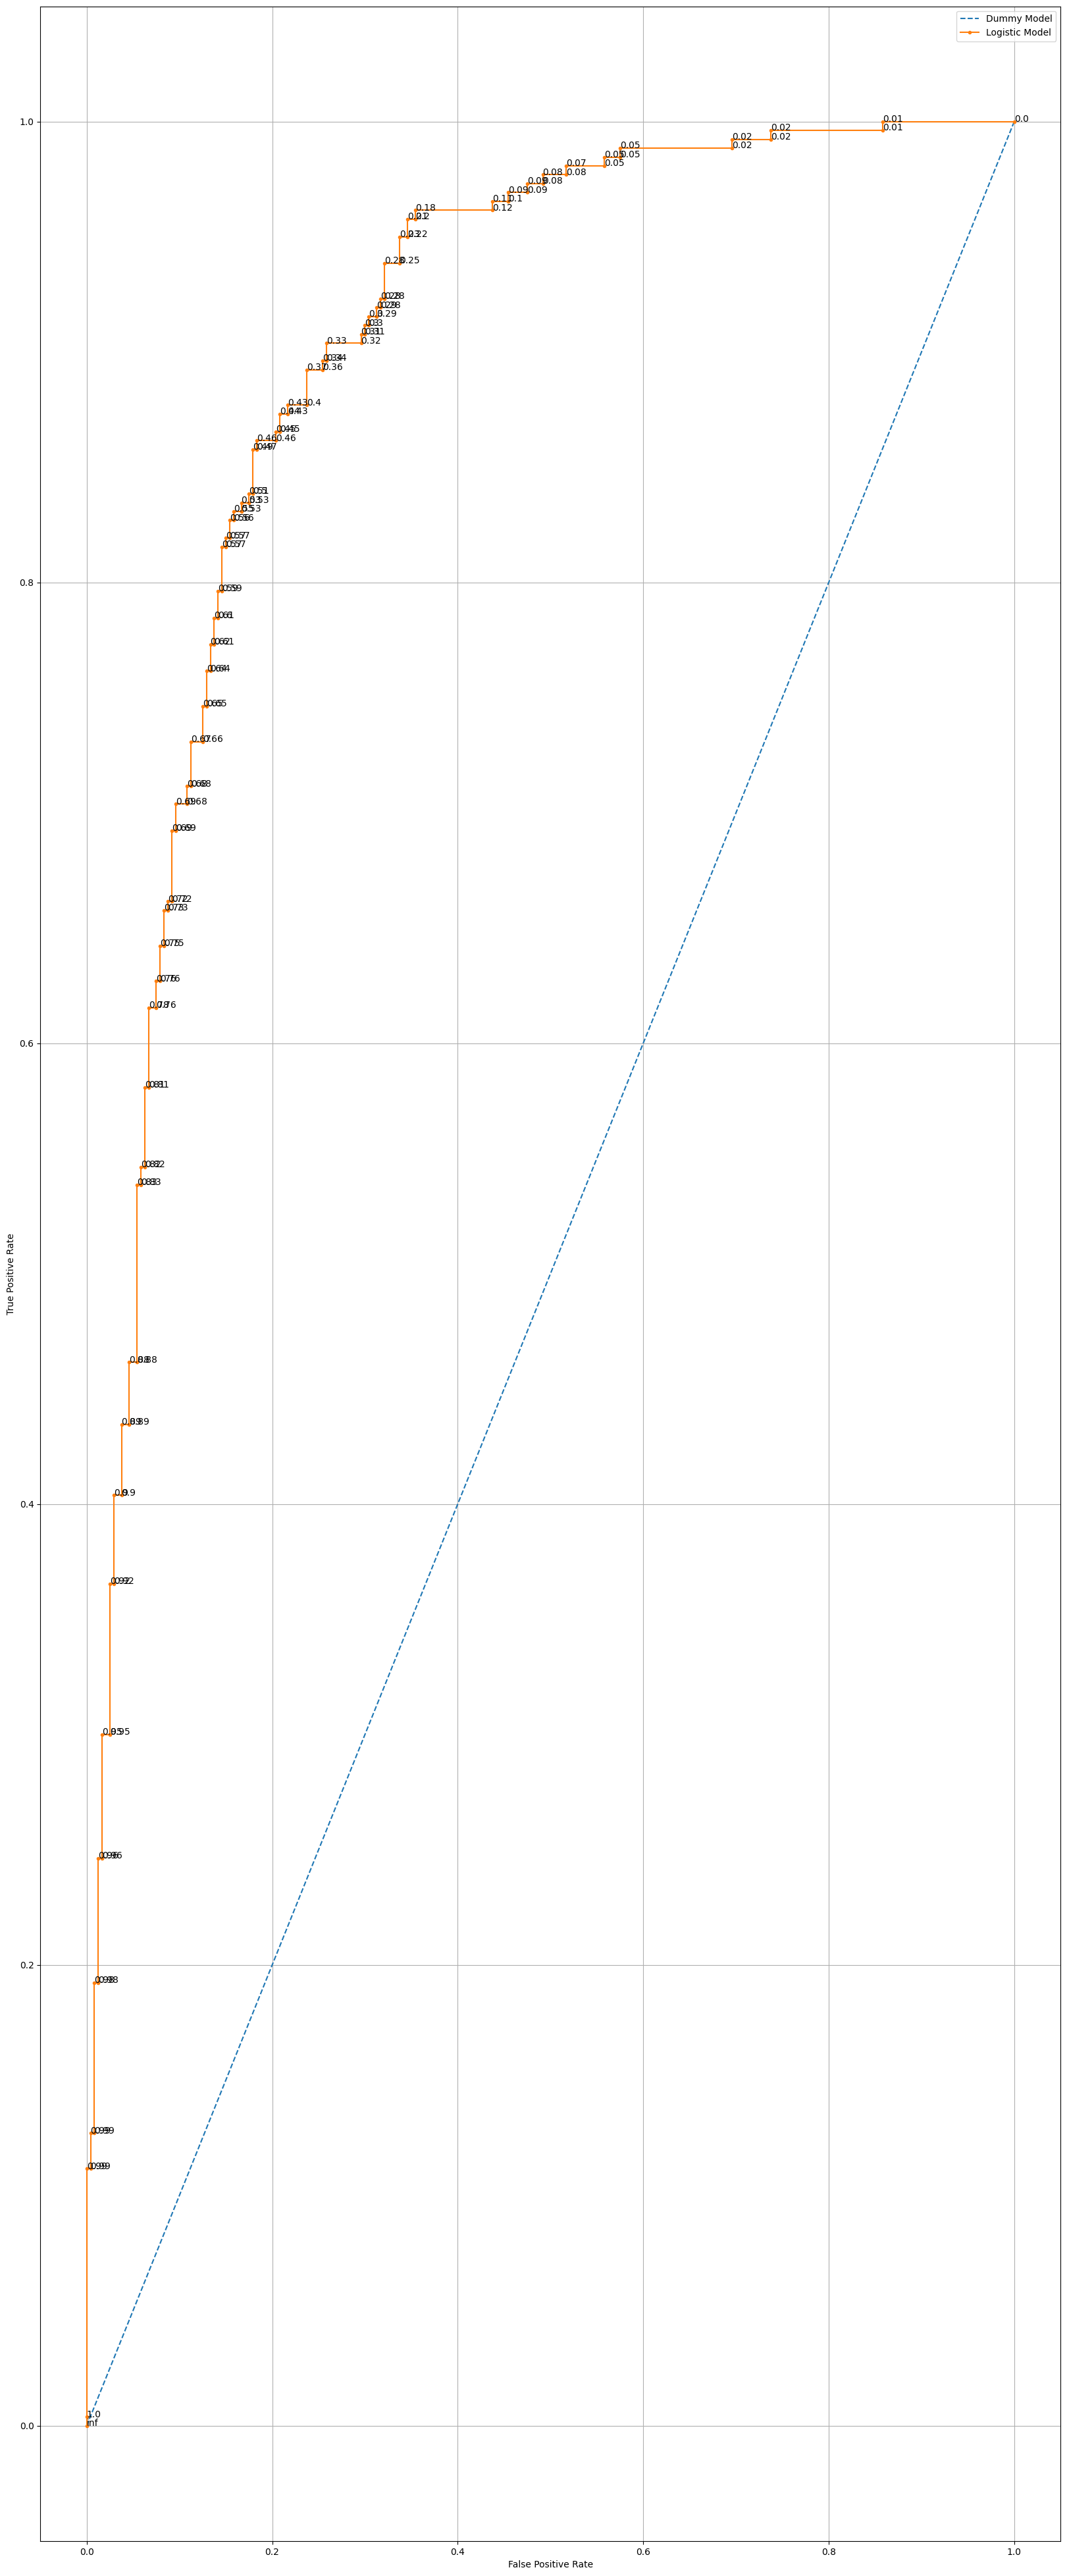

In [66]:
fig = plt.figure(figsize=(20,50))
ax = fig.add_subplot(111)
ax.plot(dummy_FPR, dummy_TPR, linestyle='--', label='Dummy Model')
ax.plot(model_FPR, model_TPR, marker='.', label='Logistic Model')
for xyz in zip(model_FPR, model_TPR, thresholds):
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0], xyz[1]))
    
#labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
plt.grid()
plt.show()
